In [3]:
from qutip import qeye, sigmaz, sigmax
from schedule import generate_local_adiabatic_pulse, find_eigen, Schedule, run
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
g_val = 50e-3
delta0 = -15 * g_val
deltaf = +15 * g_val
h0 = 0.5 * delta0 * sigmaz() + g_val * sigmax()

In [5]:
psi0_eigen, psi1_eigen = h0.eigenstates()[1]

In [124]:
sched = Schedule(sampling_rate=0.1)

duration = 250
g_bar = 2.67 * g_val
delta_array = generate_local_adiabatic_pulse(g=g_bar, T=duration, y0=delta0, yt=deltaf)
sched.append_list(list(delta_array))
sched.append_list([delta_array[-1] for _ in range(0, 1000)])
# time_array = np.linspace(0, duration, len(delta_array))


350.0
3500


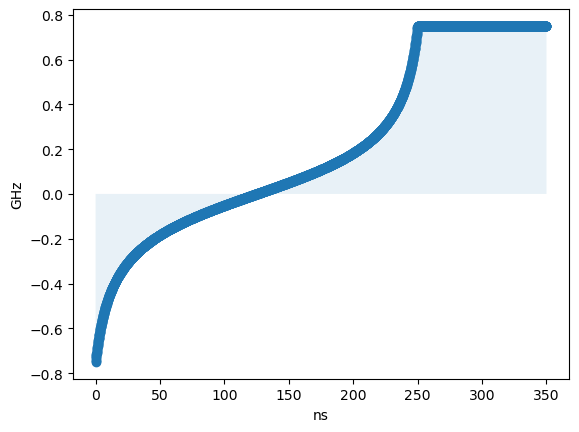

In [125]:
sched.plot()

In [126]:
H = [g_val * sigmax(), [0.5 * sigmaz(), sched.sequence]]
expt_ops = [psi0_eigen * psi0_eigen.dag(), psi1_eigen * psi1_eigen.dag()]

exp_vals, overlap = run(H0=H[0], Ht=H[1], times=sched.time_sequence, psi_init=psi0_eigen, e_ops=expt_ops, eigen_idx=[0, 1])

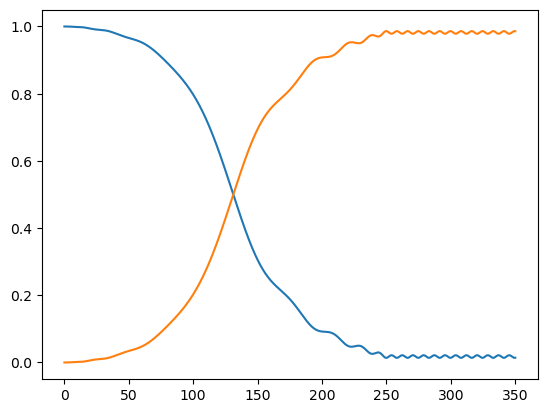

In [127]:
plt.plot(sched.time_sequence, exp_vals[0])
plt.plot(sched.time_sequence, exp_vals[1])

plt.show()

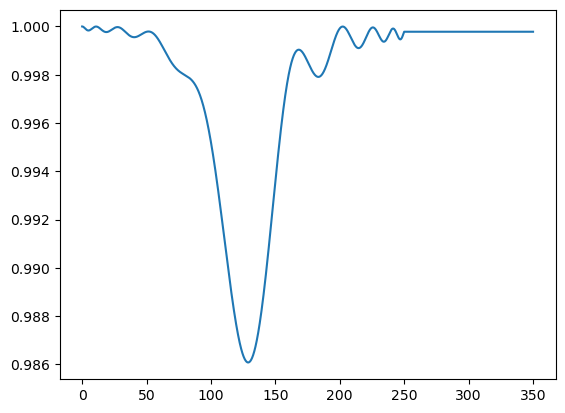

In [128]:
plt.plot(sched.time_sequence, overlap[0])
# plt.ylim(0.99, 1.0)

plt.show()

In [650]:
g_bar_fixed = 2.67 * g_val
duration_sweep = np.linspace(10, 200, 100)
dt=0.2
overlap_list = []
pop_list = []
for duration in tqdm(duration_sweep):
    delta_array = generate_local_adiabatic_pulse(g=g_bar_fixed, T=duration, y0=delta0, yt=deltaf, dt=dt)
    time_array = np.linspace(0, duration, len(delta_array))
    H = [g_val * sigmax(), [0.5 * sigmaz(), delta_array]]
    exp_vals, overlap = run(H0=H[0], Ht=H[1], times=time_array, psi_init=psi0_eigen, e_ops=expt_ops, eigen_idx=[0, 1])
    overlap_list.append(overlap[0][-1])
    pop_list.append(exp_vals[0][-1])
    

100%|██████████| 100/100 [00:47<00:00,  2.10it/s]


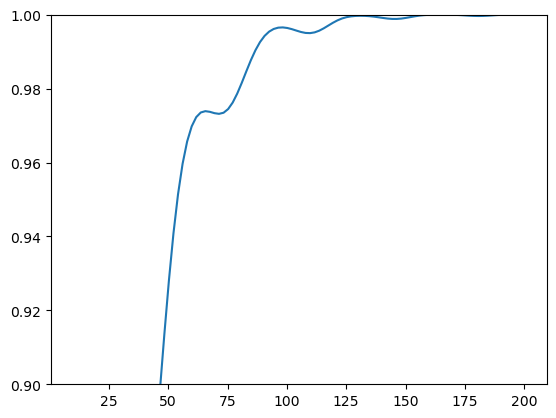

In [643]:
plt.plot(duration_sweep, overlap_list)
plt.ylim(0.9, 1.0)
plt.show()

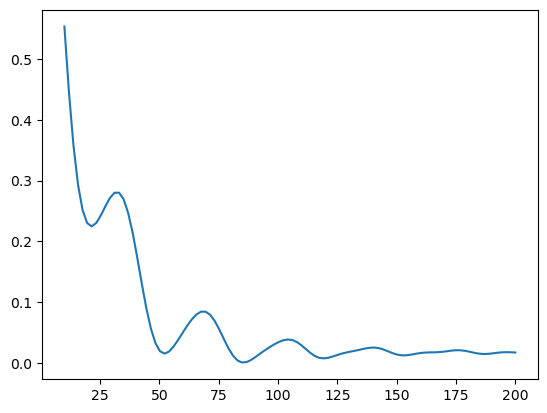

In [644]:
plt.plot(duration_sweep, pop_list)
plt.show()